In [2]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [4]:
df = pd.read_csv(r'/Users/jerenolsen/desktop/ML_Group33_Project/Train_rev1_2.csv', 
                 usecols = ['Id','Title','LocationRaw','LocationNormalized',
                'ContractType','ContractTime','Company','Category',
                'SalaryRaw','SalaryNormalized','SourceName'])
                 
                 #quoting=csv.QUOTE_NONE,error_bad_lines=False)


In [26]:
df


,Id,Title,LocationRaw,LocationNormalized,ContractType,ContractTime,Company,Category,SalaryRaw,SalaryNormalized,SourceName
0,12612628,Engineering Systems Analyst,"Dorking, Surrey, Surrey",Dorking,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,25000,cv-library.co.uk
1,12612830,Stress Engineer Glasgow,"Glasgow, Scotland, Scotland",Glasgow,NaN,permanent,Gregory Martin International,Engineering Jobs,25000 - 35000/annum 25-35K,30000,cv-library.co.uk
2,12612844,Modelling and simulation analyst,"Hampshire, South East, South East",Hampshire,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 40000/annum 20-40K,30000,cv-library.co.uk
3,12613049,Engineering Systems Analyst / Mathematical Mod...,"Surrey, South East, South East",Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,25000 - 30000/annum 25K-30K negotiable,27500,cv-library.co.uk
4,12613647,"Pioneer, Miser Engineering Systems Analyst","Surrey, South East, South East",Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,25000,cv-library.co.uk
...,...,...,...,...,...,...,...,...,...,...,...
244763,72705211,TEACHER OF SCIENCE,Swindon,Swindon,NaN,contract,NaN,Teaching Jobs,450 - 500 per week,22800,hays.co.uk
244764,72705212,TEACHER OF BUSINESS STUDIES AND ICT,Swindon,Swindon,NaN,contract,NaN,Teaching Jobs,450 - 500 per week,22800,hays.co.uk
244765,72705213,ENGLISH TEACHER,Swindon,Swindon,NaN,contract,NaN,Teaching Jobs,450 - 500 per week,22800,hays.co.uk
244766,72705216,SUPPLY TEACHERS,Wiltshire,Wiltshire,NaN,contract,NaN,Teaching Jobs,450 to 500 per week,22800,hays.co.uk


In [5]:
#How many unique entries are there by feature? Or how many unique instances are there per feature. 

unique_dict = {}
datatypes = df.dtypes
for col in df.columns:
    print(col)
    if col == 'Id':
        continue
    if datatypes[col] == 'object':
        df[col] = df[col].values.astype('str')
    vals = df[col].values
    unique_vals = np.unique(vals)
    unique_dict[col] = unique_vals

Id
Title
LocationRaw
LocationNormalized
ContractType
ContractTime
Company
Category
SalaryRaw
SalaryNormalized
SourceName


In [6]:
keys = unique_dict.keys()
lengths = []
for key in keys:
    lengths.append(len(unique_dict[key]))
features = [key for key in keys]
unique_vals = unique_dict.values()
df2 = pd.DataFrame({'Features':features,'Unique Values':lengths})

In [7]:
df2

,Features,Unique Values
0,Title,135436
1,LocationRaw,20986
2,LocationNormalized,2732
3,ContractType,3
4,ContractTime,3
5,Company,20813
6,Category,29
7,SalaryRaw,97286
8,SalaryNormalized,8454
9,SourceName,168


In [8]:
print(unique_dict['ContractType'])

['full_time' 'nan' 'part_time']


In [9]:
full_time_avgsalary = df.loc[df['ContractType'] =='full_time', 'SalaryNormalized']
print(len(full_time_avgsalary))
print(full_time_avgsalary.mean())

57538
31601.048385414855


In [10]:
part_time_avgsalary = df.loc[df['ContractType'] == 'part_time', 'SalaryNormalized']
print(len(part_time_avgsalary))
print(part_time_avgsalary.mean())

7904
19259.765055668016


In [11]:
Nan_contractType = df.loc[df['ContractType']=='nan']
len(Nan_contractType)

179326

In [12]:
df3 = pd.DataFrame({'Contract Type':['avg. Salary Full Time','avg. Salary Part Time'], 'Average Salary':[31601,19259]} )
df3
        

,Contract Type,Average Salary
0,avg. Salary Full Time,31601
1,avg. Salary Part Time,19259


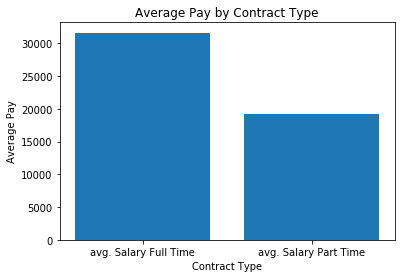

In [13]:
#Average pay by contract plot

plt.bar('Contract Type', 'Average Salary',data = df3)
plt.xlabel('Contract Type')
#plt.xticks(rotation = 90)
plt.ylabel('Average Pay')
plt.title('Average Pay by Contract Type')
plt.show()

In [14]:
df4 = pd.DataFrame({'Data Label':['Full Time Contracts','Part Time Contracts', 'All Data'],'Counts':[57538,7904,244769]})

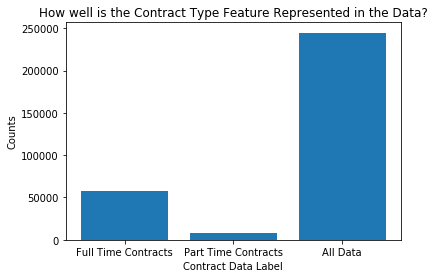

In [15]:
#How well is the contract type feature represented in the data?

plt.bar('Data Label', 'Counts',data = df4)
plt.xlabel('Contract Data Label')
#plt.xticks(rotation = 90)
plt.ylabel('Counts')
plt.title('How well is the Contract Type Feature Represented in the Data?')
plt.show()

In [21]:
#Check if there are duplicates in the dataset (there are none)
duplicates = [entry for entry in df.duplicated() if entry]
print(len(duplicates))

0
